<a href="https://colab.research.google.com/github/lucasscattolin/netflix_movie_analysis/blob/main/investigatin_netflix_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📺 Netflix Movie Analysis

This project explores a dataset of Netflix movies to understand key characteristics of the content available. The analysis includes:

- **Movie Duration Distribution:** Visualizing the typical duration of movies on the platform.
- **Most Frequent Genres:** Identifying the most common movie genres.
- **Analysis of 1990s Movies:** Investigating the most frequent movie duration and counting short action movies released in the 1990s.

This analysis provides insights into the variety and trends of Netflix's movie library.

## 📊 The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## 📦 Library Import

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

##📂 Dataset Loading

In [45]:
netflix_df = pd.read_csv("/content/netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


## 🔍 Initial Data Exploration

In [48]:
netflix_df.info()
netflix_df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812.000000,4812.000000,4812,4812
unique,4812,2,4812,3615,4690,72,1292,NaN,NaN,4807,31
top,s7784,Movie,Zubaan,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,NaN,A young Han Solo tries to settle an old score ...,Dramas
freq,1,4677,1,18,10,1886,100,NaN,NaN,2,1343
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.711554,99.566708,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.517978,30.889305,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,88.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,99.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,116.000000,NaN,NaN


## 🎯 Filtering: Movies Only

In [49]:
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


⏱️ Movie Duration Distribution

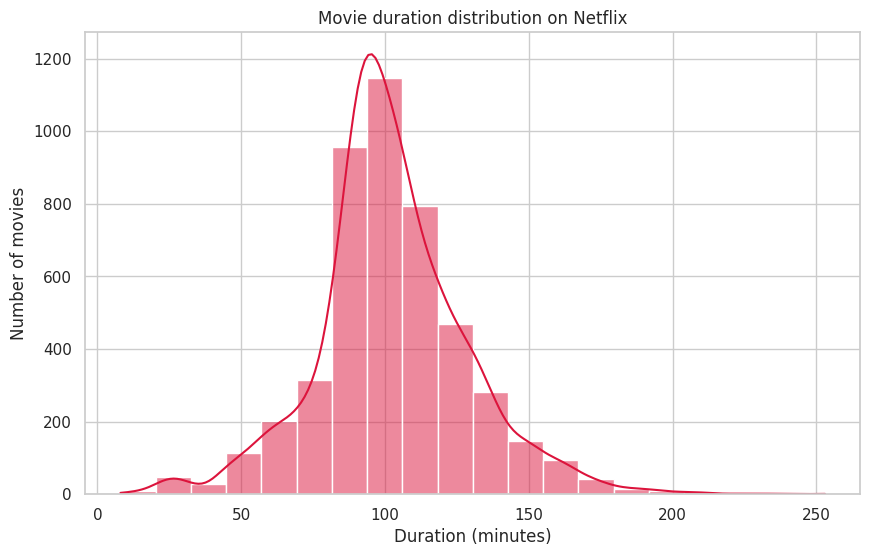

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies['duration'], bins=20, kde=True, color="crimson")
plt.title("Movie duration distribution on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")
plt.show()

## 🎭 Most Common Genres

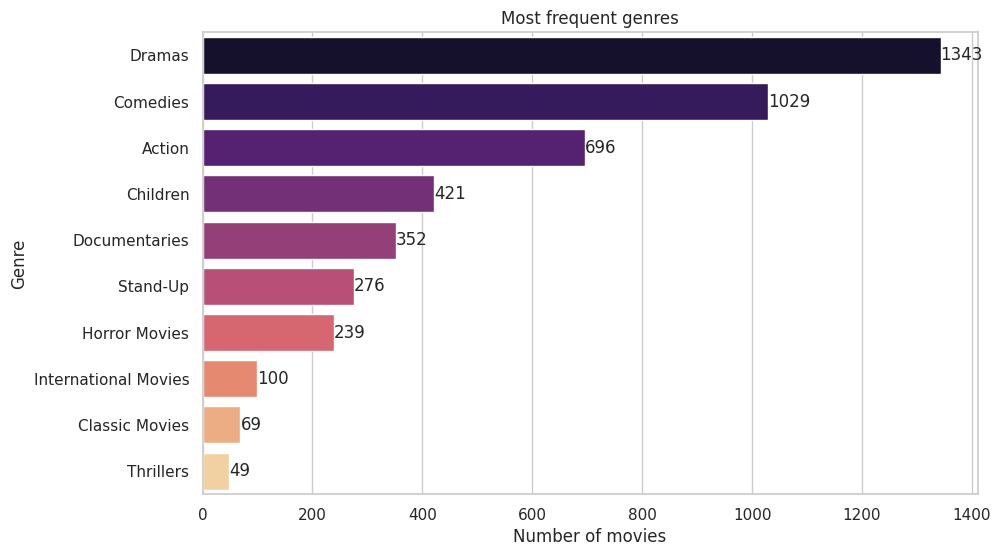

In [78]:
plt.figure(figsize=(10, 6))
top_genres = netflix_movies['genre'].value_counts().head(10)
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette="magma", hue=top_genres.index, legend=False)
plt.title("Most frequent genres")
plt.xlabel("Number of movies")
plt.ylabel("Genre")

# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## ⌛ What was the most frequent movie duration in the 1990s?

In [94]:
is_90s = np.logical_and(netflix_df['release_year'] >= 1990, netflix_df['release_year'] <= 1999)
netflix_df_90s = netflix_df[is_90s]
duration = netflix_df_90s['duration'].mode()[0]
count = netflix_df_90s['duration'].value_counts().max()

print(f'The most frequent movie duration in the 90s was {duration} minutes, {count} movies had that duration.')

The most frequent movie duration in the 90s was 94 minutes, 7 movies had that duration.


## 💥 Short-Action Movies

In [109]:
is_short_movie = netflix_df_90s['duration'] < 90
is_action_movie = netflix_df_90s['genre'] == 'Action'
netflix_df_short_action_90s = netflix_df_90s[is_short_movie & is_action_movie]
count = netflix_df_short_action_90s.shape[0]

print(f'There were {count} action movies with a duration less than 90 minutes in the 90s.')

for index, row in netflix_df_short_action_90s.iterrows():
  print(f'"{row["title"]}" with a duration of {row["duration"]} minutes.')

There were 7 action movies with a duration less than 90 minutes in the 90s.
"EVANGELION: DEATH (TRUE)²" with a duration of 69 minutes.
"Hero" with a duration of 89 minutes.
"Look Out, Officer" with a duration of 88 minutes.
"Passenger 57" with a duration of 84 minutes.
"Rumble in the Bronx" with a duration of 89 minutes.
"The Bare-Footed Kid" with a duration of 83 minutes.
"The End of Evangelion" with a duration of 87 minutes.
